In [ ]:
#!/usr/bin/env python
# coding: utf-8

import pandas as pd
import requests
import time
from bs4 import BeautifulSoup

df = pd.read_excel('UniversityData_Graduate.xlsx', sheet_name='Automated')

df.head()

Crname= df['Course Name'].values
Cwebsite = df['Course Website'].values
tag = df['Tag'].values
clname= df['Class Name'].values

found=[]
contents=[]
termsCount = []
digitization_terms = ['Advanced manufacturing','Artificial intelligence','Algorithms','Automation','Big data',
                      'Bitcoin','Blockchain','Blogs','Cybersecurity','Email','Information systems','Internet',
                      'Internet of things','IoT','Intranet','Machine learning','Privacy','Remote employees','Robotics',
                      'Social media','Software applications','Technology','Telecommuting','Videoconferencing','Virtual',
                      'augmented reality','Virtual teams','Wikis']





In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.shape

(0, 12)

In [ ]:
df.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Tag', 'Class Name'],
      dtype='object')

In [ ]:
df['Course Website'].dropna(inplace=True)

In [ ]:
for i in range(len(Crname)):
    pageLink = Cwebsite[i]
    response = requests.get(pageLink, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36',})
    html = response.content  # get the html
    time.sleep(2)  # wait 2 secs
    soup = BeautifulSoup(html.decode('ascii', 'ignore'), 'lxml')  # parse the html
    reviews = soup.findAll(tag[i], {'class': clname[i]})  # get all the review divs
    for review in reviews:
        content = review.text.lower()
        contents.append(content)
        flag=0
        terms=[]
        for each in digitization_terms:
            if each.lower() in content:
                terms.append(each.lower())
                flag=1
        if flag ==1:
            found.append(terms)
            termsCount.append(len(terms))
        if flag!=1:
            found.append('No Digitization Terms Found')       
            termsCount.append(0)
        
print(len(found))
print(len(contents))
print(len(termsCount))
        
newdf= df

newdf = newdf.drop(['Tag', 'Class Name'], axis=1)

newdf['Course Curriculum']= contents
newdf['Digitization Terms']=found
newdf['Terms Count']=termsCount

newdf.head()


0
0
0


,Sl No,University Name,Location,Tier,Degree Level,Major,Course Number,Course Name,Core / Elective,Course Website,Course Curriculum,Digitization Terms,Terms Count


In [ ]:
import pandas as pd

In [ ]:
df2 = pd.read_excel('UniversityData_Graduate.xlsx', sheet_name='Manual')
df2.head()

,Sl No,University Name,Location,Tier,Degree Level,Major,Course Number,Course Name,Core / Elective,Course Website,Course Curriculum
0,1.0,Harvard Business School,Americas,Top Tier,Graduate,MBA,2233,Leadership and Organizational Behavior (LEAD),Core,https://www.hbs.edu/mba/academic-experience/cu...,This course focuses on how managers become eff...
1,NaN,Harvard Business School,Americas,Top Tier,Graduate,NaN,2238,Leadership and Corporate Accountability (LCA),Core,https://www.hbs.edu/mba/academic-experience/cu...,"In this course, students learn about the compl..."
2,NaN,Harvard Business School,Americas,Top Tier,Graduate,NaN,2236,Behavioral Economics for Managerial Decision M...,Elective,https://www.hbs.edu/coursecatalog/2236.html,Effective managers need sound judgment to navi...
3,NaN,Harvard Business School,Americas,Top Tier,Graduate,NaN,2240,Negotiations,Elective,https://www.hbs.edu/coursecatalog/2240.html,Career Focus & Educational Objectives\nManager...
4,NaN,Harvard Business School,Americas,Top Tier,Graduate,NaN,2090,Authentic Leadership Development,Elective,https://www.hbs.edu/coursecatalog/2090.html,Course Purpose - Who Should Take this Course?\...


In [ ]:

found1=[]
contents1=[]
termsCount1 = []
Cdescription = df2['Course Curriculum'].values

for review in Cdescription:
    content = review.lower()
    # contents.append(content)
    flag=0
    terms=[]
    for each in digitization_terms:
        if each.lower() in content:
            terms.append(each.lower())
            flag=1
    if flag ==1:
        found1.append(terms)
        termsCount1.append(len(terms))
    if flag!=1:
        found1.append('No Digitization Terms Found')       
        termsCount1.append(0)
        
print(len(found1))
# print(len(contents))
print(len(termsCount1))
        


121
121


In [ ]:
df2.shape

(121, 11)

In [ ]:
newdf2= df2


# newdf2['Course Curriculum']= contents
newdf2['Digitization Terms']=found1
newdf2['Terms Count']=termsCount1

newdf2.head()

,Sl No,University Name,Location,Tier,Degree Level,Major,Course Number,Course Name,Core / Elective,Course Website,Course Curriculum,Digitization Terms,Terms Count
0,1.0,Harvard Business School,Americas,Top Tier,Graduate,MBA,2233,Leadership and Organizational Behavior (LEAD),Core,https://www.hbs.edu/mba/academic-experience/cu...,This course focuses on how managers become eff...,No Digitization Terms Found,0
1,NaN,Harvard Business School,Americas,Top Tier,Graduate,NaN,2238,Leadership and Corporate Accountability (LCA),Core,https://www.hbs.edu/mba/academic-experience/cu...,"In this course, students learn about the compl...",No Digitization Terms Found,0
2,NaN,Harvard Business School,Americas,Top Tier,Graduate,NaN,2236,Behavioral Economics for Managerial Decision M...,Elective,https://www.hbs.edu/coursecatalog/2236.html,Effective managers need sound judgment to navi...,No Digitization Terms Found,0
3,NaN,Harvard Business School,Americas,Top Tier,Graduate,NaN,2240,Negotiations,Elective,https://www.hbs.edu/coursecatalog/2240.html,Career Focus & Educational Objectives\nManager...,No Digitization Terms Found,0
4,NaN,Harvard Business School,Americas,Top Tier,Graduate,NaN,2090,Authentic Leadership Development,Elective,https://www.hbs.edu/coursecatalog/2090.html,Course Purpose - Who Should Take this Course?\...,No Digitization Terms Found,0


In [ ]:
newdf.shape

(0, 13)

In [ ]:
# newdf.drop('Course Website', axis=1, inplace=True)

In [ ]:
newdf.shape

(0, 13)

In [ ]:
newdf.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Course Curriculum', 'Digitization Terms', 'Terms Count'],
      dtype='object')

In [ ]:
newdf2.shape

(121, 13)

In [ ]:
newdf2.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Course Curriculum', 'Digitization Terms', 'Terms Count'],
      dtype='object')

In [ ]:
finaldf = newdf.append(newdf2, ignore_index=True)

In [ ]:
finaldf.shape

(121, 13)

In [ ]:
finaldf.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Course Curriculum', 'Digitization Terms', 'Terms Count'],
      dtype='object')

In [ ]:
finaldf.to_excel('MaCuDe_Output.xlsx', header=True, index= False)

In [ ]:
!ls

MaCuDe_Output.xlsx  sample_data  UniversityData_Graduate.xlsx


In [ ]:
!pwd

/content


In [ ]:
adf=pd.read_excel('MaCuDe_Output.xlsx')

In [ ]:
adf.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Course Curriculum', 'Digitization Terms', 'Terms Count'],
      dtype='object')

In [ ]:
finaldf.columns

Index(['Sl No', 'University Name', 'Location', 'Tier', 'Degree Level', 'Major',
       'Course Number', 'Course Name', 'Core / Elective', 'Course Website',
       'Course Curriculum', 'Digitization Terms', 'Terms Count'],
      dtype='object')

In [ ]:
electivepercent=finaldf[(finaldf['Terms Count']>0) & (finaldf['Core / Elective']=='Elective')]['Terms Count'].count()/len(finaldf[finaldf['Core / Elective']=='Elective'].values)

In [ ]:
corepercent= finaldf[(finaldf['Terms Count']>0) & (finaldf['Core / Elective']=='Core')]['Terms Count'].count()/len(finaldf[finaldf['Core / Elective']=='Core'].values)

In [ ]:
import plotly.graph_objects as go

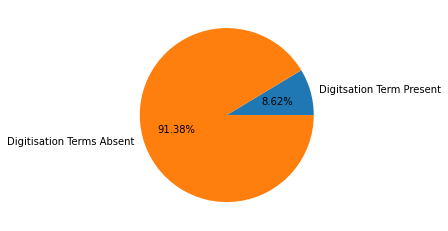

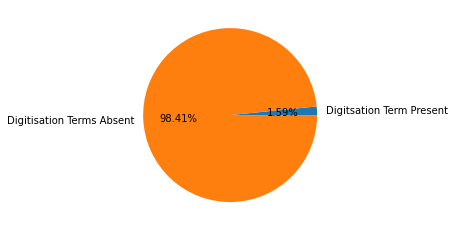

In [ ]:
import matplotlib.pyplot as plt
fig = go.Figure(data=[go.Table(
    header=dict(values=['Elective Courses Containing Digitised Termss', 'Total Number of Elective Courses'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[finaldf[(finaldf['Terms Count']>0) & (finaldf['Core / Elective']=='Elective')]['Terms Count'].count(), # 1st column
    len(finaldf[finaldf['Core / Elective']=='Elective'].values)], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=300)
fig.show()
plt.pie([electivepercent, 1-electivepercent], labels=[ 'Digitsation Term Present', 'Digitisation Terms Absent'], autopct='%1.2f%%')
# plt.label('Elective Courses')
# plt.title('Elective Courses')
plt.show()


fig = go.Figure(data=[go.Table(
    header=dict(values=['Core Courses Containing Digitised Termss', 'Total Number of Core Courses'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[finaldf[(finaldf['Terms Count']>0) & (finaldf['Core / Elective']=='Core')]['Terms Count'].count(), # 1st column
    len(finaldf[finaldf['Core / Elective']=='Core'].values)], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=300)
fig.show()

plt.pie([corepercent, 1-corepercent], labels=[ 'Digitsation Term Present', 'Digitisation Terms Absent'], autopct='%1.2f%%')
# plt.title('Core Courses')
plt.show()
# plt.label('Core Courses')
# plt.show()

In [ ]:
finaldf.head()

,Sl No,University Name,Location,Tier,Degree Level,Major,Course Number,Course Name,Core / Elective,Course Website,Course Curriculum,Digitization Terms,Terms Count
0,1.0,Harvard Business School,Americas,Top Tier,Graduate,MBA,2233,Leadership and Organizational Behavior (LEAD),Core,https://www.hbs.edu/mba/academic-experience/cu...,This course focuses on how managers become eff...,No Digitization Terms Found,0.0
1,NaN,Harvard Business School,Americas,Top Tier,Graduate,NaN,2238,Leadership and Corporate Accountability (LCA),Core,https://www.hbs.edu/mba/academic-experience/cu...,"In this course, students learn about the compl...",No Digitization Terms Found,0.0
2,NaN,Harvard Business School,Americas,Top Tier,Graduate,NaN,2236,Behavioral Economics for Managerial Decision M...,Elective,https://www.hbs.edu/coursecatalog/2236.html,Effective managers need sound judgment to navi...,No Digitization Terms Found,0.0
3,NaN,Harvard Business School,Americas,Top Tier,Graduate,NaN,2240,Negotiations,Elective,https://www.hbs.edu/coursecatalog/2240.html,Career Focus & Educational Objectives\nManager...,No Digitization Terms Found,0.0
4,NaN,Harvard Business School,Americas,Top Tier,Graduate,NaN,2090,Authentic Leadership Development,Elective,https://www.hbs.edu/coursecatalog/2090.html,Course Purpose - Who Should Take this Course?\...,No Digitization Terms Found,0.0


In [ ]:
digidf = finaldf[(finaldf['Terms Count']>0)]

# Percentage of universities having digitised content

In [ ]:
peruni = len(digidf['University Name'].value_counts())/len(finaldf['University Name'].value_counts())

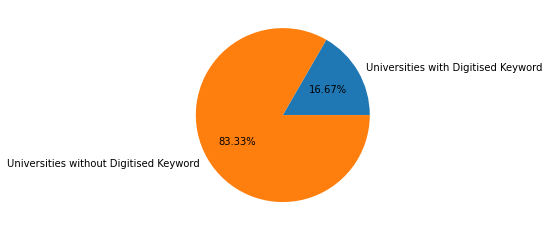

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=['No. of Universities Containing Digitised Termss', 'Total Number of Universities'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[len(digidf['University Name'].value_counts()), # 1st column
    len(finaldf['University Name'].value_counts())], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=500, height=300)
fig.show()
plt.pie([peruni, 1-peruni], labels=[ 'Universities with Digitised Keyword', 'Universities without Digitised Keyword'], autopct='%1.2f%%')
# plt.label('Elective Courses')
# plt.title('Universities')
plt.show()

# Percentage of keywords by location [Division by all the university count]

In [ ]:
digidf['Location'].value_counts()

Americas    6
Name: Location, dtype: int64

In [ ]:
digidf['University Name'].value_counts()

Vanderbilt University: Owen                      2
University of North Carolina: \nKenan-Flagler    1
University of Michigan: Ross                     1
Columbia Business School                         1
University of Florida: Warrington                1
Name: University Name, dtype: int64

In [ ]:

a = digidf['University Name'].value_counts()

In [ ]:
a.index

Index(['Vanderbilt University: Owen',
       'University of North Carolina: \nKenan-Flagler',
       'University of Michigan: Ross', 'Columbia Business School',
       'University of Florida: Warrington'],
      dtype='object')

In [ ]:
dict1={}

In [ ]:
#Calculating location of universities having digitised content
for j in a.index:
  print(j)
  location = digidf[digidf['University Name']==j]['Location'].unique()
  # print(location[0])
  print(location[0])
  loc= str(location[0])
  if loc in dict1.keys():
    dict1[location[0]]=dict1[location[0]]+1
  else:
    dict1[location[0]]=1
  # print(dict1)

Vanderbilt University: Owen
Americas
University of North Carolina: 
Kenan-Flagler
Americas
University of Michigan: Ross
Americas
Columbia Business School
Americas
University of Florida: Warrington
Americas


In [ ]:
dict1

{'Americas': 5}

In [ ]:
newdict={}

In [ ]:
for j,k in dict1.items():
  newdict[j]= k/len(finaldf['University Name'].value_counts())

In [ ]:
newdict

{'Americas': 0.16666666666666666}

In [ ]:
tmp = finaldf['Location'].unique()

In [ ]:
for j in tmp:
  if j not in newdict.keys():
    dict1[j]=0
    newdict[j]=0

In [ ]:
newdict

{'Americas': 0.16666666666666666, 'Asia': 0, 'Europe': 0}

In [ ]:
dict1

{'Americas': 5, 'Asia': 0, 'Europe': 0}

In [ ]:
country=list(dict1.keys())
countrycount=list(dict1.values())

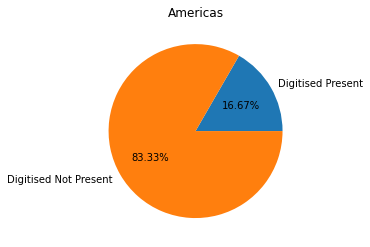

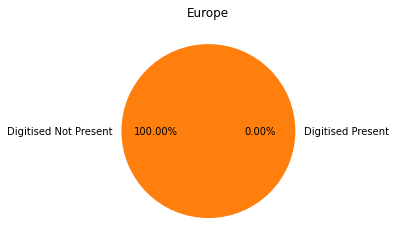

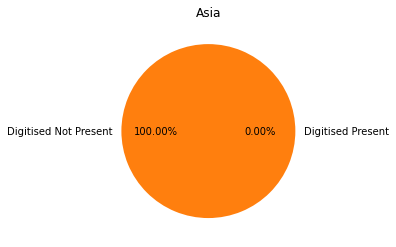

In [ ]:
z=0
for i, j in newdict.items():
  fig = go.Figure(data=[go.Table(
      header=dict(values=['Total number of '+country[z]+' Universities containing digitisation terms', 'Total Number of Universities'],
                  line_color='darkslategray',
                  fill_color='lightskyblue',
                  align='left'),
      cells=dict(values=[countrycount[z],
      len(finaldf['University Name'].value_counts())],
                line_color='darkslategray',
                fill_color='lightcyan',
                align='left'))
  ])

  fig.update_layout(width=500, height=300)
  fig.show()
  plt.pie([j, 1-j], labels=[ 'Digitised Present', 'Digitised Not Present'], autopct='%1.2f%%')
# plt.label('Elective Courses')
  plt.title(i)
  plt.show()
  z=z+1

Percentage of universities by location [Division by number of univesities / location]

In [ ]:
locationdict={}

In [ ]:
a = finaldf['University Name'].value_counts()

In [ ]:
#Calculating location of universities having digitised content
for j in a.index:
  print(j)
  location = finaldf[finaldf['University Name']==j]['Location'].unique()
  # print(location[0])
  print(location[0])
  loc= str(location[0])
  if loc in locationdict.keys():
    locationdict[location[0]]=locationdict[location[0]]+1
  else:
    locationdict[location[0]]=1
  # print(dict1)

Washington University: Olin
Americas
Vanderbilt University: Owen
Americas
Carnegie Mellon: Tepper
Americas
University of Virginia: Darden
Americas
Dartmouth College: Tuck
Americas
Insead
Europe
Harvard Business School
Americas
Warwick Business School
Europe
London Business School
Europe
University of Pennsylvania: Wharton
Americas
University of Chicago: Booth
Americas
CUHK Business School
Asia
University of Washington: Foster
Americas
Nanyang Business School, NTU 
Singapore
Asia
Duke University: Fuqua
Americas
Emory University: Goizueta
Americas
Stanford Graduate School of Business
Americas
University of Southern California: 
Marshall
Americas
University of Florida: Warrington
Americas
University of Michigan: Ross
Americas
Columbia Business School
Americas
University of North Carolina: 
Kenan-Flagler
Americas
Northwestern University: Kellogg
Americas
City, University of London: Cass
Europe
Yale School of Management
Americas
Alliance Manchester Business School
Europe
University of Calif

In [ ]:
locationdict

{'Americas': 21, 'Asia': 4, 'Europe': 5}

In [ ]:
dict1

{'Americas': 5, 'Asia': 0, 'Europe': 0}

In [ ]:
country1 = list(locationdict.items())
country1values = list(locationdict.values())
country2 = list(dict1.items())
country2values = list(dict1.values())

In [ ]:
for j,k in dict1.items():
  newdict[j]= k/locationdict[j]

In [ ]:
newdict

{'Americas': 0.23809523809523808, 'Asia': 0.0, 'Europe': 0.0}

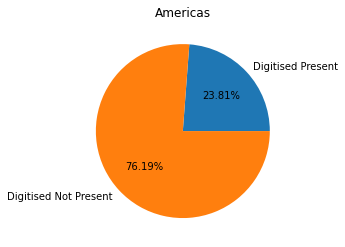

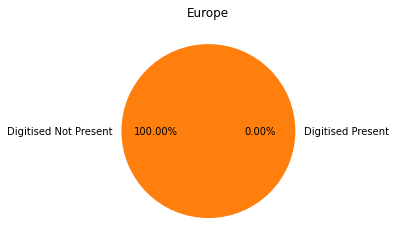

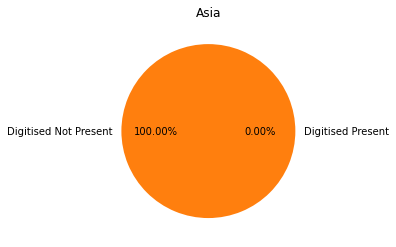

In [ ]:
z=0
for i, j in newdict.items():
  fig = go.Figure(data=[go.Table(
      header=dict(values=['Total number of '+i+' Universities containing digitisation terms', 'Total Number of '+i+' Universities'],
                  line_color='darkslategray',
                  fill_color='lightskyblue',
                  align='left'),
      cells=dict(values=[country2values[z],
      country1values[z]],
                line_color='darkslategray',
                fill_color='lightcyan',
                align='left'))
  ])
  fig.update_layout(width=500, height=300)
  fig.show()
  plt.pie([j, 1-j], labels=[ 'Digitised Present', 'Digitised Not Present'], autopct='%1.2f%%')
# plt.label('Elective Courses')
  plt.title(i)
  plt.show()
  z=z+1